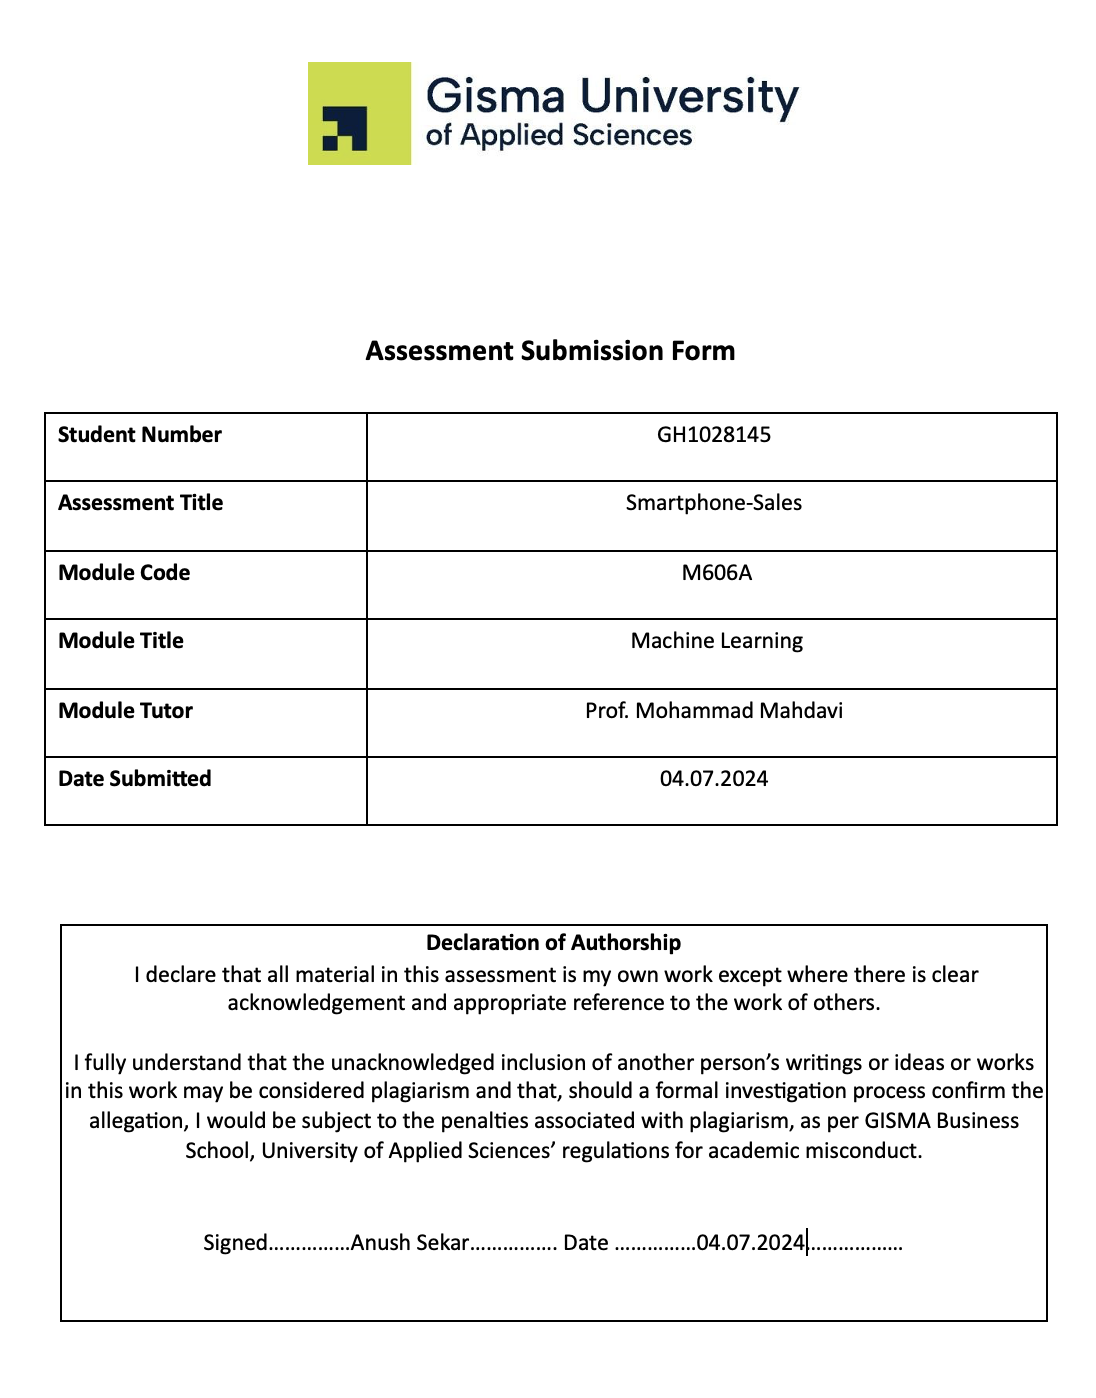

## **Problem Statement: SmartPhone_Sales**
           
The smartphone market has high demand these days, new brands are popping up each month and mobile models from each brands released frequently. The consumer has more choices and the crucial role plays in their decision making is price. For that the manufacturers and retailers, need to predict the seeling price of the smartphone based on their feature include in the mobile.

To solve this problem I developed a machine learning model that can predict the selling price of the smartphone based on its features. This will help the manufacturers and retailers to set proper pricing and make informed decision making.

**Dataset:** https://www.kaggle.com/datasets/yaminh/smartphone-sale-dataset/data

In [99]:
import pandas as teddy
import numpy as nope
import matplotlib.pyplot as dot
import seaborn as sos

import warnings
warnings.filterwarnings('ignore')

### Reading the sales dataset from kaggle

In [100]:
smp = teddy.read_csv('Sales.csv')

smp.head()

,SM_Brands,B_Models,SM_Colors,SM_RAM,SM_Storage,SM_Camera,M_Rating,Selling_Price,Original_Price,Mobile,Discount,Discount_percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,realme C2,1000,12.501563
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000


### Exploring the Data 

In [101]:
smp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SM_Brands            3114 non-null   object 
 1   B_Models             3114 non-null   object 
 2   SM_Colors            3114 non-null   object 
 3   SM_RAM               3071 non-null   object 
 4   SM_Storage           3075 non-null   object 
 5   SM_Camera            3114 non-null   object 
 6   M_Rating             2970 non-null   float64
 7   Selling_Price        3114 non-null   int64  
 8   Original_Price       3114 non-null   int64  
 9   Mobile               3114 non-null   object 
 10  Discount             3114 non-null   int64  
 11  Discount_percentage  3114 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 292.1+ KB


In [102]:
smp.describe()

,M_Rating,Selling_Price,Original_Price,Discount,Discount_percentage
count,2970.000000,3114.000000,3114.000000,3114.000000,3114.000000
mean,4.243098,26436.625562,28333.473025,1896.847463,6.086788
std,0.271991,30066.892622,31525.599889,5337.126176,11.106776
min,2.300000,1000.000000,1000.000000,-8000.000000,-160.320641
25%,4.100000,9990.000000,10030.250000,0.000000,0.000000
50%,4.300000,15000.000000,16889.500000,0.000000,0.000000
75%,4.400000,28999.000000,31500.000000,2000.000000,9.836388
max,5.000000,179900.000000,189999.000000,75000.000000,70.610305


In [103]:
smp.duplicated().sum()

108

In [104]:
smp.drop_duplicates(keep='first', inplace=True)

### Droping the duplicate datas

In [105]:
smp['SM_Camera'].value_counts()

SM_Camera
Yes    3006
Name: count, dtype: int64

#### I'm dropping both models and camera because models name are already there in mobile column and and every mobile has camera.

In [106]:
smp = smp.drop(columns=['B_Models', 'SM_Camera'])

smp.head()

,SM_Brands,SM_Colors,SM_RAM,SM_Storage,M_Rating,Selling_Price,Original_Price,Mobile,Discount,Discount_percentage
0,SAMSUNG,Mirage Black,8 GB,128 GB,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,Steel,2 GB,16 GB,3.8,10199,10199,Nokia 3.2,0,0.000000
2,realme,Diamond Black,2 GB,NaN,4.4,6999,7999,realme C2,1000,12.501563
3,Infinix,Ice Blue,4 GB,64 GB,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,Black,4GB,64 GB,4.6,49900,49900,Apple iPhone 11,0,0.000000


### Searching for the null values in the dataset

In [107]:
smp.isnull().sum()

SM_Brands                0
SM_Colors                0
SM_RAM                  40
SM_Storage              39
M_Rating               130
Selling_Price            0
Original_Price           0
Mobile                   0
Discount                 0
Discount_percentage      0
dtype: int64

### Filling the empty spaces with mean values of the column

In [108]:
smp['M_Rating'].fillna(smp['M_Rating'].mean(), inplace=True)

smp.head()

,SM_Brands,SM_Colors,SM_RAM,SM_Storage,M_Rating,Selling_Price,Original_Price,Mobile,Discount,Discount_percentage
0,SAMSUNG,Mirage Black,8 GB,128 GB,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,Steel,2 GB,16 GB,3.8,10199,10199,Nokia 3.2,0,0.000000
2,realme,Diamond Black,2 GB,NaN,4.4,6999,7999,realme C2,1000,12.501563
3,Infinix,Ice Blue,4 GB,64 GB,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,Black,4GB,64 GB,4.6,49900,49900,Apple iPhone 11,0,0.000000


Droping the null values if they still have anything in the data

In [109]:
smp.dropna(inplace=True)

In [110]:
smp['SM_RAM'].value_counts()

SM_RAM
4 GB      726
6 GB      483
3 GB      467
2 GB      362
8 GB      336
1 GB      191
4GB       113
12 GB      58
512 MB     46
4 MB       39
1.5 GB     29
16 MB      15
64 MB      14
32 MB      14
8 MB       10
768 MB      6
128 MB      4
10 MB       3
2 MB        2
46 MB       2
18 GB       2
16 GB       2
153 MB      1
30 MB       1
100 MB      1
Name: count, dtype: int64

Here we can see little problem with our dataset it's given 4GB . I will changed it to 4 GB

In [111]:
smp['SM_RAM'] = smp['SM_RAM'].replace('4GB', '4 GB')

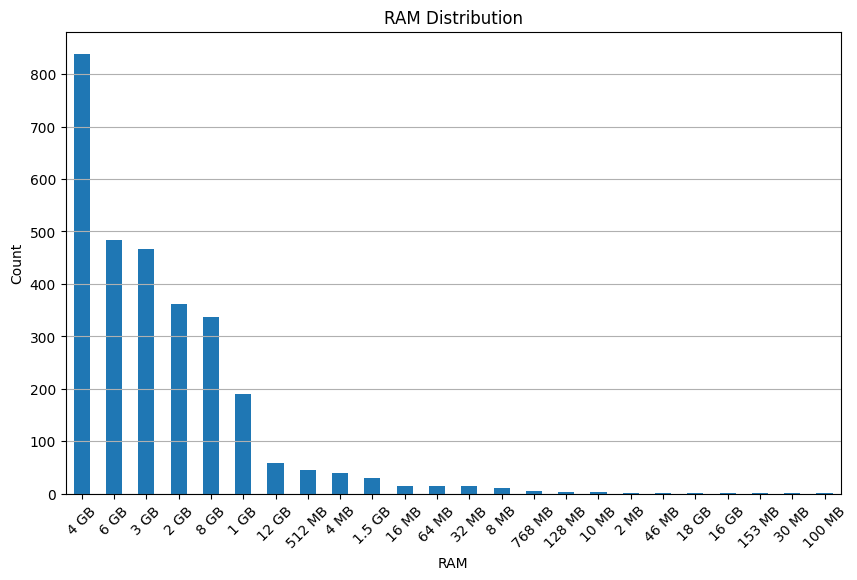

In [112]:
dot.figure(figsize=(10, 6))
smp['SM_RAM'].value_counts().plot(kind='bar')
dot.title('RAM Distribution')
dot.xlabel('RAM')
dot.ylabel('Count')
dot.xticks(rotation=45)
dot.grid(axis='y')
dot.show()

From the above observation & analysis I am droping RAM after 8 MB RAM to make a good model

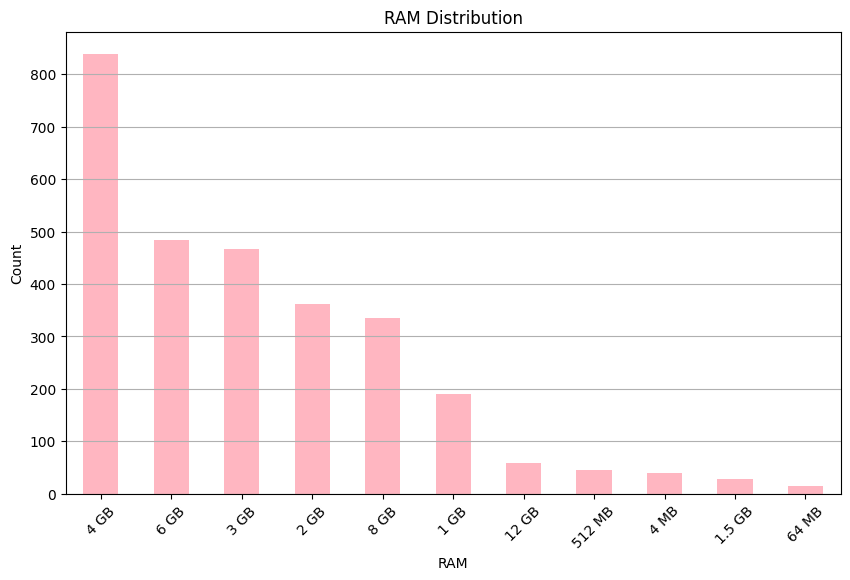

In [113]:
invalid_memory_values = ['768 MB', '128 MB', '10 MB', '2 MB', '46 MB', '18 GB', '16 GB', '153 MB', '30 MB', '100 MB','8 MB','32 MB', '16 MB']

smp = smp[~smp['SM_RAM'].isin(invalid_memory_values)]

dot.figure(figsize=(10, 6))
smp['SM_RAM'].value_counts().plot(kind='bar',color='lightpink')
dot.title('RAM Distribution')
dot.xlabel('RAM')
dot.ylabel('Count')
dot.xticks(rotation=45)
dot.grid(axis='y')
dot.show()

In [114]:
smp['SM_Storage'].value_counts()

SM_Storage
64 GB                    749
128 GB                   736
32 GB                    539
16 GB                    312
256 GB                   213
8 GB                     133
512 GB                    53
4 GB                      50
4 MB                      28
1 TB                      14
128 MB                    11
2 MB                       8
129 GB                     3
Expandable Upto 32 GB      3
Expandable Upto 16 GB      2
512 MB                     2
130 GB                     2
8 MB                       2
256 MB                     2
100 MB                     1
140 MB                     1
Name: count, dtype: int64

Same thing for storage too I keeping the only the valid and more than 10 counts in the storage.

In [115]:
smp['SM_Storage'] = smp['SM_Storage'].replace('1 TB', '1000 GB')

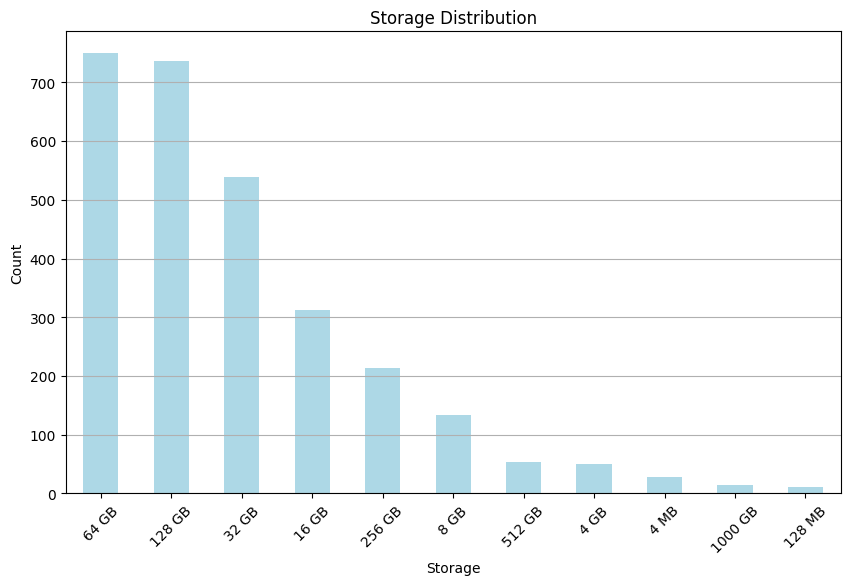

In [116]:
invalid_storage_values = ['Expandable Upto 32 GB', 'Expandable Upto 16 GB', '8 MB', '256 MB', '129 GB', '130 GB', '64 MB', '512 MB', '10 MB', '100 MB', '140 MB', '2 MB']

smp = smp[~smp['SM_Storage'].isin(invalid_storage_values)]

dot.figure(figsize=(10, 6))
smp['SM_Storage'].value_counts().plot(kind='bar', color='lightblue')
dot.title('Storage Distribution')
dot.xlabel('Storage')
dot.ylabel('Count')
dot.xticks(rotation=45)
dot.grid(axis='y')
dot.show()

In [117]:
smp['SM_Colors'].value_counts()

SM_Colors
Black                369
Gold                 182
White                142
Blue                 134
Silver                93
                    ... 
Breeze Blue            1
Iris Charcoal          1
MAGIC BLUE             1
Phantom Green          1
Sapphire Gradient      1
Name: count, Length: 636, dtype: int64

I'm dropping the colors column, since each brand has its own set of color names.

In [118]:
smp = smp.drop(columns=['SM_Colors'])

In [119]:
smp.head()

,SM_Brands,SM_RAM,SM_Storage,M_Rating,Selling_Price,Original_Price,Mobile,Discount,Discount_percentage
0,SAMSUNG,8 GB,128 GB,4.300000,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,2 GB,16 GB,3.800000,10199,10199,Nokia 3.2,0,0.000000
3,Infinix,4 GB,64 GB,4.200000,12999,12999,Infinix Note 5,0,0.000000
4,Apple,4 GB,64 GB,4.600000,49900,49900,Apple iPhone 11,0,0.000000
6,Apple,6 GB,512 GB,4.236057,99900,99900,Apple iPhone 13 Mini,0,0.000000


In [120]:
smp['Mobile'].value_counts()

Mobile
Apple iPhone 13 Pro Max    19
Apple iPhone 11            19
Apple iPhone XR            18
Apple iPhone 12 Mini       18
SAMSUNG Galaxy A12         18
                           ..
Motorola Edge+              1
LG V40 ThinQ                1
LG Nexus4 E960              1
Nokia 150                   1
LG Q Stylus                 1
Name: count, Length: 872, dtype: int64

Each Brand has differnt models and mobiles, different varient of RAM and Storages. Because of that I going to keep only the Brands and the different varient of RAM and Storage.

In [121]:
smp = smp.drop(columns=['Mobile'])

In [122]:
smp.head()

,SM_Brands,SM_RAM,SM_Storage,M_Rating,Selling_Price,Original_Price,Discount,Discount_percentage
0,SAMSUNG,8 GB,128 GB,4.300000,19330,20999,1669,7.947998
1,Nokia,2 GB,16 GB,3.800000,10199,10199,0,0.000000
3,Infinix,4 GB,64 GB,4.200000,12999,12999,0,0.000000
4,Apple,4 GB,64 GB,4.600000,49900,49900,0,0.000000
6,Apple,6 GB,512 GB,4.236057,99900,99900,0,0.000000


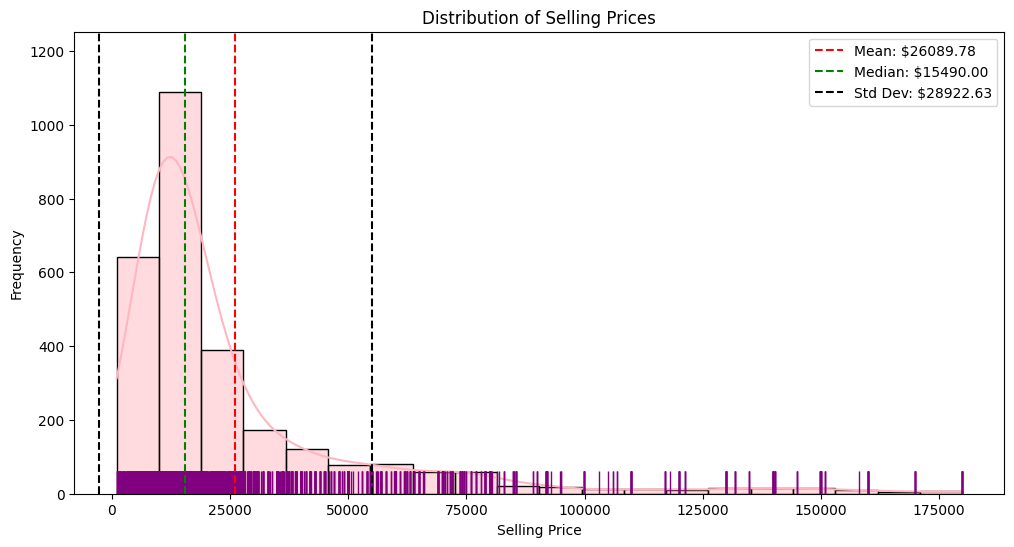

In [123]:
dot.figure(figsize=(12, 6))

sos.histplot(smp['Selling_Price'], bins=20, kde=True, color='lightpink')

dot.xlabel('Selling Price')
dot.ylabel('Frequency')
dot.title('Distribution of Selling Prices')

sos.rugplot(smp['Selling_Price'], color='purple', height=0.05)

# Add summary statistics (mean, median, and standard deviation)
mean_o_p = smp['Selling_Price'].mean()
median_o_p = smp['Selling_Price'].median()
std_o_p = smp['Selling_Price'].std()
dot.axvline(mean_o_p, color='red', linestyle='--', label=f'Mean: ${mean_o_p:.2f}')
dot.axvline(median_o_p, color='green', linestyle='--', label=f'Median: ${median_o_p:.2f}')
dot.axvline(mean_o_p + std_o_p, color='black', linestyle='--', label=f'Std Dev: ${std_o_p:.2f}')
dot.axvline(mean_o_p - std_o_p, color='black', linestyle='--')

dot.legend()
dot.show()

I'm showing this selling price distribution for statistical analysis.

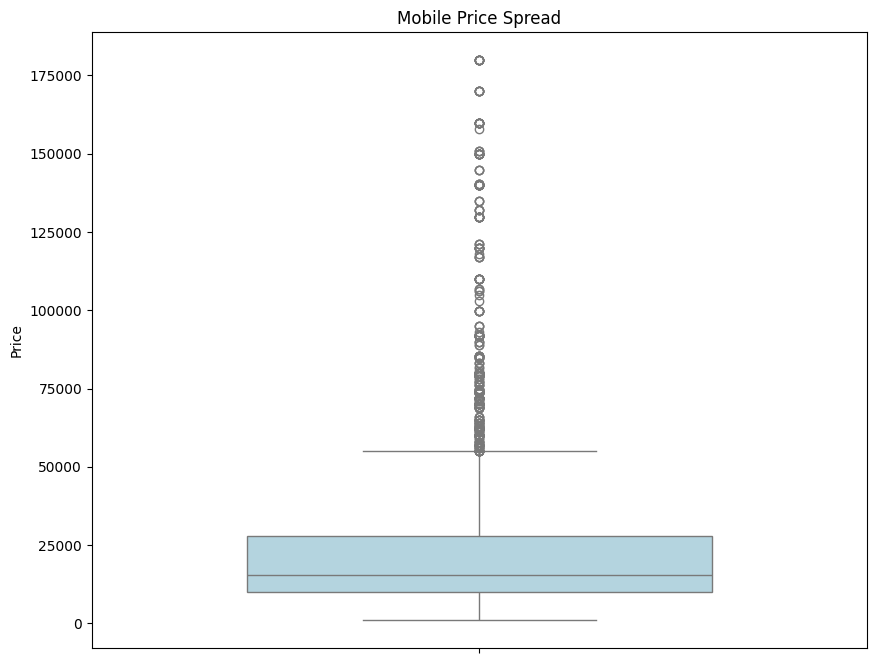

In [124]:
dot.figure(figsize=(10, 8))
dot.title('Mobile Price Spread')

sos.boxplot(y=smp['Selling_Price'], color='lightblue', width=0.6, orient='v')

dot.ylabel('Price')
dot.xlabel('')
dot.show()

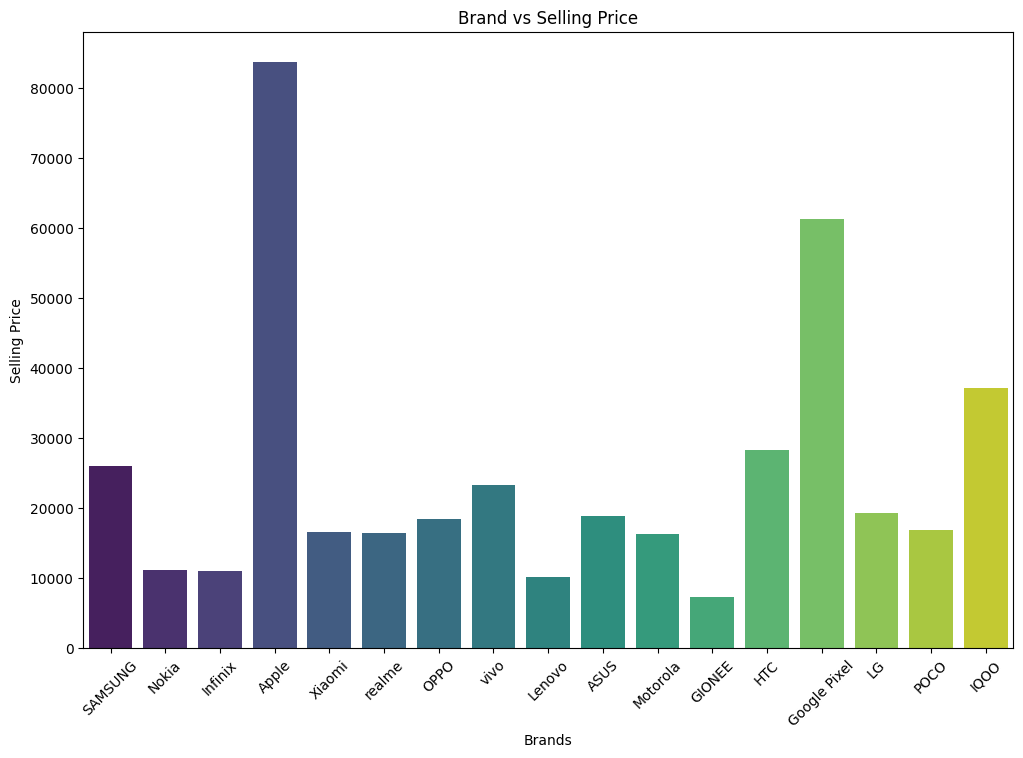

In [125]:
dot.figure(figsize=(12, 8))

# Create a bar plot of Brand versus Original Price
sos.barplot(x='SM_Brands', y='Selling_Price', data=smp, ci=None, palette='viridis')

dot.xlabel('Brands')
dot.ylabel('Selling Price')
dot.title('Brand vs Selling Price')
dot.xticks(rotation=45)

dot.show()

Giving the visualization of the Brands and their selling price of their products.

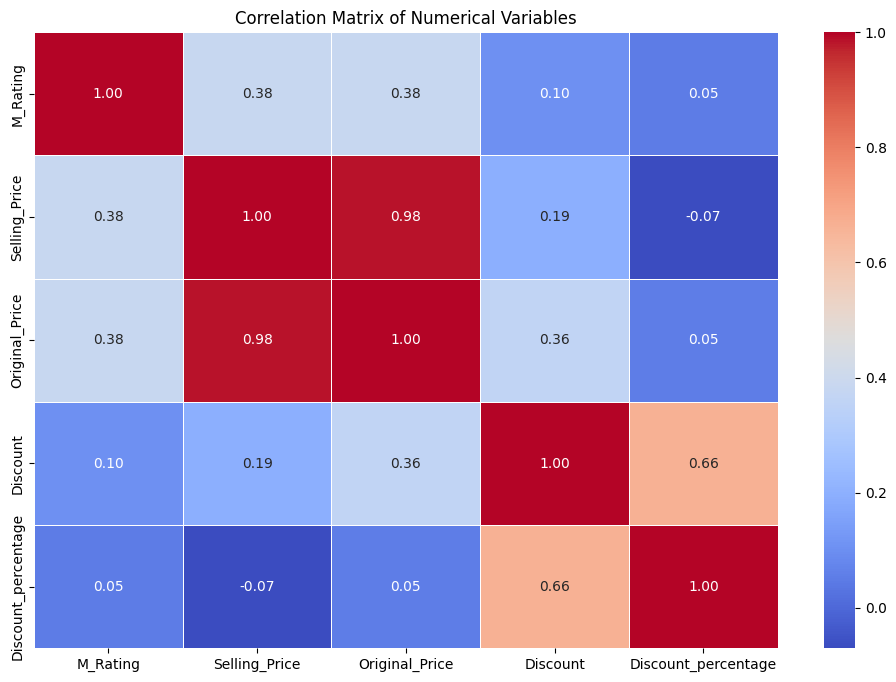

In [37]:
num_smp = smp.select_dtypes(include=['float64', 'int64'])

c_matrix = num_smp.corr()

dot.figure(figsize=(12, 8))
sos.heatmap(c_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

dot.title('Correlation Matrix of Numerical Variables')
plt.show()

I used the correlation matrix to see which cloumns has the highly correlated with each other and the column Original Price and the Selling Price is Highly correlated, So I am Keeping the selling and droping the original price.

In [126]:
smp = smp.drop(columns=['Original_Price'])

## Encoding categorical variables

### Label encoding

In [127]:
smp['SM_RAM'].value_counts()

SM_RAM
4 GB      839
6 GB      481
3 GB      467
2 GB      362
8 GB      332
1 GB      191
12 GB      58
512 MB     40
1.5 GB     29
4 MB       28
64 MB      11
Name: count, dtype: int64

In [128]:
R_hierarchy = {
    '4 GB': 4,
    '3 GB': 5,
    '6 GB': 3,
    '2 GB': 6,
    '8 GB': 2,
    '1 GB': 8,
    '12 GB': 1,
    '512 MB': 9,
    '4 MB': 11,
    '1.5 GB': 7,
    '64 MB': 10
}

smp['SM_RAM'] = smp['SM_RAM'].map(R_hierarchy)
smp.head()

,SM_Brands,SM_RAM,SM_Storage,M_Rating,Selling_Price,Discount,Discount_percentage
0,SAMSUNG,2,128 GB,4.300000,19330,1669,7.947998
1,Nokia,6,16 GB,3.800000,10199,0,0.000000
3,Infinix,4,64 GB,4.200000,12999,0,0.000000
4,Apple,4,64 GB,4.600000,49900,0,0.000000
6,Apple,3,512 GB,4.236057,99900,0,0.000000


In [129]:
smp['SM_Storage'].value_counts()

SM_Storage
64 GB      749
128 GB     736
32 GB      539
16 GB      312
256 GB     213
8 GB       133
512 GB      53
4 GB        50
4 MB        28
1000 GB     14
128 MB      11
Name: count, dtype: int64

In [130]:
S_hierarchy = {
    '1000 GB': 1,
    '512 GB': 2,
    '256 GB': 3,
    '128 GB': 4,
    '64 GB': 5,
    '32 GB': 6,
    '16 GB': 7,
    '8 GB': 8,
    '4 GB': 9,
    '128 MB': 10,
    '4 MB': 11
}

smp['SM_Storage'] = smp['SM_Storage'].map(S_hierarchy)

smp.head()

,SM_Brands,SM_RAM,SM_Storage,M_Rating,Selling_Price,Discount,Discount_percentage
0,SAMSUNG,2,4,4.300000,19330,1669,7.947998
1,Nokia,6,7,3.800000,10199,0,0.000000
3,Infinix,4,5,4.200000,12999,0,0.000000
4,Apple,4,5,4.600000,49900,0,0.000000
6,Apple,3,2,4.236057,99900,0,0.000000


### One-hot encoding

In [43]:
smpb_encoded = teddy.get_dummies(smp['SM_Brands'], prefix='SM_Brand')

smpb_encoded = smpb_encoded.astype(int)

sm_encoded = teddy.concat([smp, smpb_encoded], axis=1)

sm_encoded.head()

,SM_Brands,SM_RAM,SM_Storage,M_Rating,Selling_Price,Discount,Discount_percentage,SM_Brand_ASUS,SM_Brand_Apple,SM_Brand_GIONEE,...,SM_Brand_LG,SM_Brand_Lenovo,SM_Brand_Motorola,SM_Brand_Nokia,SM_Brand_OPPO,SM_Brand_POCO,SM_Brand_SAMSUNG,SM_Brand_Xiaomi,SM_Brand_realme,SM_Brand_vivo
0,SAMSUNG,2,4,4.300000,19330,1669,7.947998,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,Nokia,6,7,3.800000,10199,0,0.000000,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,Infinix,4,5,4.200000,12999,0,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Apple,4,5,4.600000,49900,0,0.000000,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,Apple,3,2,4.236057,99900,0,0.000000,0,1,0,...,0,0,0,0,0,0,0,0,0,0


I'm converting the object values to integers. So that there won't be any data leakage and to get the accurate model score.

Dropping the brand since it's an object data type.

In [44]:
sm_encoded = sm_encoded.drop(columns=['SM_Brands'])

In [45]:
sm_encoded.head()

,SM_RAM,SM_Storage,M_Rating,Selling_Price,Discount,Discount_percentage,SM_Brand_ASUS,SM_Brand_Apple,SM_Brand_GIONEE,SM_Brand_Google Pixel,...,SM_Brand_LG,SM_Brand_Lenovo,SM_Brand_Motorola,SM_Brand_Nokia,SM_Brand_OPPO,SM_Brand_POCO,SM_Brand_SAMSUNG,SM_Brand_Xiaomi,SM_Brand_realme,SM_Brand_vivo
0,2,4,4.300000,19330,1669,7.947998,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,6,7,3.800000,10199,0,0.000000,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,4,5,4.200000,12999,0,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,5,4.600000,49900,0,0.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3,2,4.236057,99900,0,0.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
sm_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2838 entries, 0 to 3113
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SM_RAM                 2838 non-null   int64  
 1   SM_Storage             2838 non-null   int64  
 2   M_Rating               2838 non-null   float64
 3   Selling_Price          2838 non-null   int64  
 4   Discount               2838 non-null   int64  
 5   Discount_percentage    2838 non-null   float64
 6   SM_Brand_ASUS          2838 non-null   int64  
 7   SM_Brand_Apple         2838 non-null   int64  
 8   SM_Brand_GIONEE        2838 non-null   int64  
 9   SM_Brand_Google Pixel  2838 non-null   int64  
 10  SM_Brand_HTC           2838 non-null   int64  
 11  SM_Brand_IQOO          2838 non-null   int64  
 12  SM_Brand_Infinix       2838 non-null   int64  
 13  SM_Brand_LG            2838 non-null   int64  
 14  SM_Brand_Lenovo        2838 non-null   int64  
 15  SM_Brand_

*Checking before starting the model training if they have any object data type in our data*

## Model Training and Testing

In [131]:
from sklearn.model_selection import train_test_split as mstts
from sklearn.preprocessing import StandardScaler as ppss


S = sm_encoded.drop(columns=['Selling_Price'])
t= sm_encoded['Selling_Price']

S_train, S_test, t_train, t_test = mstts(S, t, test_size=0.2, random_state=42)

ss = ppss()

S_train_scaled = ss.fit_transform(S_train)
S_test_scaled = ss.transform(S_test)

print("X_train_scaled shape:", S_train_scaled.shape)
print("X_test_scaled shape:", S_test_scaled.shape)
print("y_train shape:", t_train.shape)
print("y_test shape:", t_test.shape)

X_train_scaled shape: (2270, 22)
X_test_scaled shape: (568, 22)
y_train shape: (2270,)
y_test shape: (568,)


## DecisionTreeRegressor

In [133]:
from sklearn.tree import DecisionTreeRegressor as tdtr


aj = tdtr(random_state=42)


aj.fit(S_train_scaled, t_train)
t_pred = aj.predict(S_test_scaled)

m_s_e = mmse(t_test, t_pred)
r_sq = rs(t_test, t_pred)


print("Decision Tree Regression:")
print("Mean Squared Error (MSE):", m_s_e)
print("R-squared:", r_sq)

Decision Tree Regression:
Mean Squared Error (MSE): 60453880.756776646
R-squared: 0.9424798182843552


## RandomForestRegressor

In [134]:
from sklearn.ensemble import RandomForestRegressor as erfr


sj = erfr(random_state=42)

sj.fit(S_train_scaled, t_train)
t_pred = sj.predict(S_test_scaled)

m_s_e = mmse(t_test, t_pred)
r_sq = rs(t_test, t_pred)

print("Random Forest Regression:")
print("Mean Squared Error (MSE):", m_s_e)
print("R-squared:", r_sq)

Random Forest Regression:
Mean Squared Error (MSE): 68640547.3458443
R-squared: 0.9346904333192588


## KNeighborsRegressor

In [137]:
from sklearn.neighbors import KNeighborsRegressor as nknr

pp = nknr()

pp.fit(S_train_scaled, t_train)
t_pred = pp.predict(S_test_scaled)

m_s_e = mmse(t_test, t_pred)
r_sq = rs(t_test, t_pred)

print("K-Nearest Neighbors Regression:")
print("Mean Squared Error (MSE):", m_s_e)
print("R-squared:", r_sq)

K-Nearest Neighbors Regression:
Mean Squared Error (MSE): 99866445.61056337
R-squared: 0.9049798618896564


As we can see that decision tree regression model performed better, So let's see if we can improve the model more with hyperparameter tuning

## Hyperparameter tuning

In [138]:
from sklearn.model_selection import GridSearchCV as msgscv

p_g = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
}

model = tdtr(random_state=42)

g_s = msgscv(model, p_g, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

g_s.fit(S_train_scaled, t_train)

b_p = g_s.best_params_

b_model = tdtr(**b_p, random_state=42)

b_model.fit(S_train_scaled, t_train)

t_pred = b_model.predict(S_test_scaled)

m_s_e = mmse(t_test, t_pred)
r_sq = rs(t_test, t_pred)

print("Best Hyperparameters:", b_p)
print("Mean Squared Error (MSE) for Best Model:", m_s_e)
print("R-squared for Best Model:", r_sq)

Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean Squared Error (MSE) for Best Model: 64754835.997821406
R-squared for Best Model: 0.9383875793094733


*Decision Tree Regressor:* This model can automatically select which feature is most important based on the feature values ina smartphone and influence for the selling price.

*Random Forest Regressor:* This one builds mulitple decision tree and combine their output to get more accurate smartphone features and stable price predicition compared to a single decision tree.

*K-Nearest Neighbors Regressor:* This model will predicts the smartphone price by averaging the price of it's closest neighors in feature such as RAM, Storage,Camera so on.

Out of these three models Decsion Tree Regressor performed better. To improve the accuracy of the price predition i used hyperparameter tuning to make effiective price strategies and business decisions effectively.